<a href="https://colab.research.google.com/github/gracjans/GSN/blob/main/Gracjan_Strzelec_239580_GSN_1_zima_2021_22_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# necessary imports
from math import exp
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax

## Activation functions

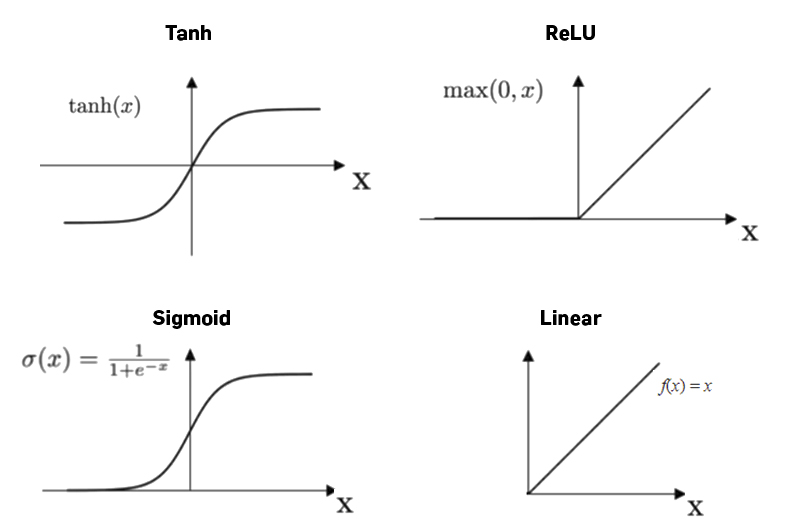

### Linear function

In [ ]:
def linear(x):
    return x

### Sigmoid function

In [ ]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

Google Colab allows to use many IPython magic commands for Timing and Profiling -> https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb#scrollTo=zSGke6c-AW0Y

In [ ]:
l1 = [2]*int(1e6)

In [ ]:
%%timeit
y = [sigmoid(x) for x in l1]

1 loop, best of 5: 296 ms per loop


Let's rewrite the function using numpy library

In [ ]:
def sigmoid_np(X):
    return 1 / (1 + np.exp(-X))

In [ ]:
l2 = np.array([2]*int(1e6))

In [ ]:
%%timeit
y = sigmoid_np(l2)

10 loops, best of 5: 23.1 ms per loop


### ReLU function

In [ ]:
def relu(x):
    return x if x > 0 else 0

### Tanh activation

In [ ]:
def tanh(x):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

In [ ]:
%%timeit
y = [tanh(x) for x in l1]

1 loop, best of 5: 577 ms per loop


In [ ]:
def tanh_np(X):
    return (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

In [ ]:
%%timeit
y = tanh_np(l2)

10 loops, best of 5: 84.5 ms per loop


Let's visualize implemented functions to check if implementation is correct

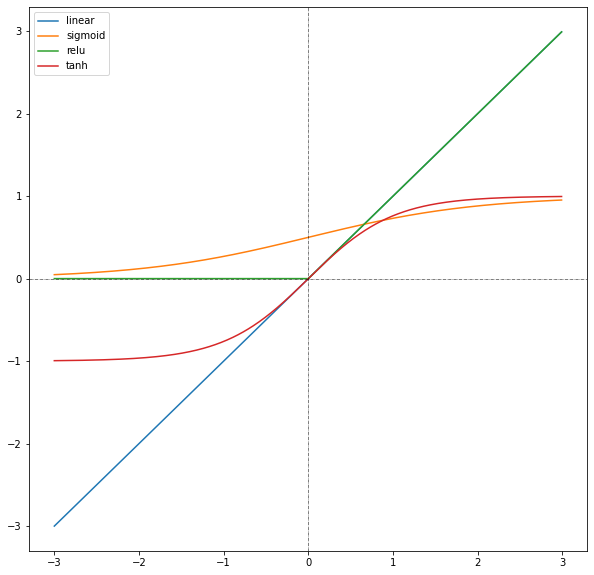

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.01)
plt.figure(figsize=(10, 10))
for activation in [linear, sigmoid, relu, tanh]:
    plt.plot(x, [activation(i) for i in x.tolist()])
plt.legend(['linear', 'sigmoid', 'relu', 'tanh'])
plt.axvline(color='black', ls='-.', lw=0.5)
plt.axhline(color='black', ls='-.', lw=0.5)
plt.show()

# Artificial neuron

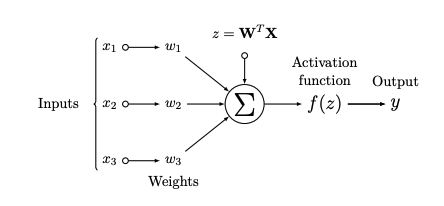

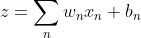

### Task 1. Implement forward pass function in Neuron class according to the given formula

In [ ]:
class Neuron:
    def __init__(self, weights, bias, activation):
        self.weights, self.bias, self.activation = weights, bias, activation

    def forward(self, inputs):
        return self.activation(sum([x*w for x,w in zip(inputs, self.weights)]) + self.bias)

    def forward_with_numpy(self, inputs):
        return self.activation(np.array(self.weights).T @ np.array(inputs) + np.array(self.bias))

In [ ]:
inputs = [1.5, 0.5]
n1 = Neuron(weights=[0.2, 0.5], bias=1.3, activation=linear)
n2 = Neuron(weights=[0.35, 0.7], bias=1, activation=linear)

In [ ]:
assert n1.forward(inputs) == 1.85

### Task 2. Implement forward pass function in Layer class

In [ ]:
class Layer:
    def __init__(self, neurons):
        self.neurons = neurons

    def forward(self, inputs):
        output = [neuron.forward(inputs) for neuron in self.neurons]
        return output

In [ ]:
l1 = Layer([n1, n2])

In [ ]:
assert l1.forward(inputs) == [1.85, 1.875]

### Task 3. Implement forward pass function in Network class

In [ ]:
class Network:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, inputs):
        current_state = inputs
        for layer in self.layers:
          current_state = layer.forward(current_state)
        return softmax(current_state)

In [ ]:
l2 = Layer([n1, n2, n1])
# since previous layer had 3 neurons, we need 3 weights in the next one!!!
n3 = Neuron([0.1, 0.6, 1.5], 3, linear)
l3 = Layer([n3, n3])

In [ ]:
# step by step calculations
f1 = l1.forward(inputs)
print(f1)
f2 = l2.forward(f1)
print(f2)
f3 = l3.forward(f2)
print(f3)
output = softmax(f3)
print(output)

[1.85, 1.875]
[2.6075, 2.96, 2.6075]
[8.948, 8.948]
[0.5 0.5]


In [ ]:
first_network = Network([l1, l2, l3])

In [ ]:
assert np.allclose(first_network.forward(inputs), np.array([0.5, 0.5]))

## NumPy version

In [ ]:
weights1 = np.array([[0.2, 0.5], [0.35, 0.7]]).T
biases1 = np.array([1.3, 1])

weights2 = np.array([[0.2, 0.5], [0.35, 0.7], [0.2, 0.5]]).T
biases2 = np.array([1.3, 1, 1.3])

weights3 = np.array([[0.1, 0.6, 1.5], [0.1, 0.6, 1.5]]).T
biases3 = np.array([3, 3])

def forward_np(inputs):
    layer1_out = np.dot(inputs, weights1) + biases1
    # print(layer1_out)
    layer2_out = np.dot(layer1_out, weights2) + biases2
    # print(layer2_out)
    layer3_out = np.dot(layer2_out, weights3) + biases3
    # print(layer3_out)
    
    return np.exp(layer3_out) / np.sum(np.exp(layer3_out))  # softmax

print(forward_np(inputs))

[0.5 0.5]


In [ ]:
%%time
for _ in range(10000):
    first_network.forward(inputs)

CPU times: user 713 ms, sys: 48.9 ms, total: 762 ms
Wall time: 695 ms


In [ ]:
%%time
for _ in range(10000):
    forward_np(inputs)

CPU times: user 171 ms, sys: 11 µs, total: 171 ms
Wall time: 171 ms


## Batches of data

In [ ]:
data_batch = np.array([inputs for _ in range(1000)])

In [ ]:
%%time
for _ in range(100):
    for sample in data_batch:
        first_network.forward(inputs)

CPU times: user 9.65 s, sys: 930 ms, total: 10.6 s
Wall time: 8.94 s


In [ ]:
%%%time
for _ in range(100):
    forward_np(data_batch)

CPU times: user 17.5 ms, sys: 948 µs, total: 18.5 ms
Wall time: 18.6 ms


### <u>Homework</u>. 

Modify the neural network implementation basing on the knowledge of efficient data batches processing using NumPy library. Try to improve on the given OOP design, e.g. by proposing simpler initialization methods (avoid passing the values of weights and biases explicitly), discarding Neuron class and moving its functionalities to the Layer class or validating automatically the shapes of weight matrices during the network initialization step.

In [ ]:
class myLayer:
    def __init__(self, neuron_count, previous_layer_shape, activation, weights=None, biases=None):
        self.neuron_count = neuron_count
        self.previous_layer_shape = previous_layer_shape
        self.activation = activation

        # check if weights or biases are passed as an network argument, otherwise initialize it with random values
        if weights is not None and biases is not None:
            self.weights, self.biases = np.array(weights), np.array(biases)

        elif weights is not None:
            self.weights = np.array(weights)
            self.biases = self.initialize_random(self.neuron_count, self.previous_layer_shape)[1]

        elif biases is not None:
            self.biases = np.array(biases)
            self.weights = self.initialize_random(self.neuron_count, self.previous_layer_shape)[0]

        else:
            self.weights, self.biases = self.initialize_random(self.neuron_count, self.previous_layer_shape)

    @staticmethod
    def initialize_random(neuron_count, previous_layer_shape):
        weights = np.random.rand(neuron_count, previous_layer_shape)
        biases = np.random.rand(neuron_count)
        return weights, biases

    def forward(self, inputs):
        z = np.dot(inputs, self.weights.T) + self.biases
        return self.activation(z)


class myNetwork:
    def __init__(self, layers_count, neurons_count, activation, weights=None, biases=None):
        self.layers_instances = []

        # initialize layer class instances
        for layer_id in range(layers_count):
            layer_weights = weights[layer_id] if weights is not None else None
            layer_biases = biases[layer_id] if biases is not None else None
            if layer_id == 0:
                self.layers_instances.append(myLayer(neurons_count[layer_id], neurons_count[0], activation, layer_weights, layer_biases))
            else:
                previous_layer_shape = self.layers_instances[layer_id-1].weights.shape
                self.layers_instances.append(myLayer(neurons_count[layer_id], previous_layer_shape[0], activation, layer_weights, layer_biases))
        
        # do validation of shapes
        self.validate_weights_shape(self.layers_instances) 

    @staticmethod
    def validate_weights_shape(layers):
        for i in range(len(layers)-1):
          assert layers[i].weights.shape[0] == layers[i+1].weights.shape[1]

    def forward(self, inputs):
        current_state = np.array(inputs)
        for layer in self.layers_instances:
          current_state = layer.forward(current_state)
        return np.exp(current_state) / np.sum(np.exp(current_state))

In [ ]:
inputs = [1.5, 0.5]
weights1 = np.array([[0.2, 0.5], [0.35, 0.7]])
biases1 = np.array([1.3, 1])
weights2 = np.array([[0.2, 0.5], [0.35, 0.7], [0.2, 0.5]])
biases2 = np.array([1.3, 1, 1.3])
weights3 = np.array([[0.1, 0.6, 1.5], [0.1, 0.6, 1.5]])
biases3 = np.array([3, 3])

# ACTIVATION FUNCTIONS 
def linear(x):
    return x

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def relu(x):
    return x * (x > 0)

def tanh(X):
    return (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

"""
myNetwork class parameters:
   layers_count: int (number of layers in neural network),
   neurons_count: tuple of ints (tuple with number of neurons in each layer)
       (lenght should correspond to number of layers defined in previous parameter)
   activation: function (one of activation function from above)
   weights: OPTIONAL - tuple of arrays (arrays of weights for each of layer)
   biases: OPTIONAL - tuple of arrays (arrays of biases for each of layer)
"""

# initialize network with weights from previous examples to check if we get the same result
myNetwork1 = myNetwork(3, (2, 3, 2), linear, (weights1, weights2, weights3), (biases1, biases2, biases3))

# initialize second network with same size as the first, but with random weights and biases
myNetwork2 = myNetwork(3, (2, 3, 2), relu)

# initialize network with 4 layers and more neurons per layer than previously
myNetwork3 = myNetwork(4, (5, 8, 4, 3), tanh)

In [ ]:
myNetwork1.forward(inputs)

array([0.5, 0.5])

In [ ]:
myNetwork2.forward(inputs)

array([0.07522966, 0.92477034])

In [ ]:
# crete new list of inputs for third_network (input layer in third_network has 5 neurons)
inputs_third_network = [1.5, 0.5, 4, 1, 0.5]

myNetwork3.forward(inputs_third_network)

array([0.31968651, 0.33855002, 0.34176347])

In [ ]:
%%time
for _ in range(10000):
    myNetwork2.forward(inputs)

CPU times: user 262 ms, sys: 0 ns, total: 262 ms
Wall time: 263 ms


In [ ]:
%%time
for _ in range(100):
    myNetwork2.forward(data_batch)

CPU times: user 20 ms, sys: 860 µs, total: 20.8 ms
Wall time: 21.6 ms


### <u>Homework (optional)</u>

Create the code as in the first homework, but using CuPy framework and executing all the computations on the GPU.